### data.gouv.fr

# Veille internationale politiques culturelles des différents pays du monde : 

Description :

La Mission de la politique documentaire du ministère de la Culture publie chaque mois en données ouvertes les résultats de sa veille internationale. 
Retrouvez ainsi sous forme cartographique une sélection d'articles issus des acteurs culturels et de la presse étrangère concernant les politiques culturelles des différents pays du monde.

Corpus :

sources locales et internationales
sources gratuites ou en accès partiel
trois langues : français, anglais, espagnol
Les données des filtres sont classées par ordre alphabétique, n'hésitez pas à dérouler les listes. L'affichage du nombre de données étant limité, certaines listes peuvent être tronquées.

Initiée en avril 2023, cette veille est susceptible d'évolutions : n'hésitez pas à nous contacter pour toute suggestion d'amélioration à l'adresse diane.gaudron@culture.gouv.fr


Créée le: 
9 août 2023

Modifiée le: 
10 août 2023

## 1 : EDA. 

In [43]:
## Faire une EDA (Exploratory Data Analyst) pour avoirs les plus d'information possible sur cette base de données. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as mno
import openpyxl as op
import seaborn as sns
%matplotlib inline
import pycountry_convert as pc
!pip install pycountry
!pip install pycountry-convert

In [3]:
pd = pd.read_excel ('veille_internationale.xlsx')

In [44]:
## Installation des pandas-profiling afin de générer un premier rapport général. 

In [45]:
!pip install -U pandas-profiling 

In [46]:
## Chercher en pandas_profiling la méthode ProfileReport 
from pandas_profiling import ProfileReport 

Cette librairie permet une analyse générale rapide, toutefois, il ne sert qu'à donner un premier aperçu général. Le travail d'analyse des données est et sera instrisequement lié à la capacité de celle ou celui qui travaille sur la base de données. 

In [47]:
## Générer le rapport 
profile = ProfileReport (pd, title = 'EDA', explorative = True )
profile


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Les informations obtenues par le rapport permettent d'obtenir des informations importantes :

### 1 - Les Organismes :

L'Unesco et l'Union européenne sont les deux organismes qui reviennent le plus.

### 2 - Les Pays :

Les Etats - Unis et le Canada sont les deux pays avec les plus d'informations donc d'articles.


### 3 Autres infos :

Cette base de données comporte plusieurs valeurs manquantes. Il faudra faire attention lors du nettoyage
afin de ne pas biaiser les résultats. 


In [8]:
## Afficher le début dataframe: 

pd.head()

,Titre,Source,Date,Chapeau,Code pays,geom,Lien hypertexte,Secteurs,Thématiques,Organismes,Pays,Relations,Numéro,geo_point_2d
0,"ABC Programa ""Sonidos para la construcción de ...",Ministerio de Cultura,2023-06-29,En el marco del plan de desarrollo 2022-2026 “...,COL,"{""coordinates"":[[[[-78.131418424,2.627264716],...",http://www.mincultura.gov.co/prensa/noticias/P...,Politiques culturelles transversales,"musique, formation, ministère de la culture",NaN,Colombie,NaN,2023-06,"3.9084856716967105, -73.08333766049374"
1,Columna de Ascanio Cavallo: Frankfurt am Main,LA TERCERA,2023-06-18,"La chambonada de la semana (¿o del mes, del añ...",CHL,"{""coordinates"":[[[[-67.501616991,-55.821058852...",https://www.latercera.com/opinion/noticia/colu...,Politiques culturelles transversales,"livre, ministère de la culture, diplomatie et ...",NaN,Chili,NaN,2023-06,"-37.768561684505066, -71.36590162990602"
2,Le gouvernement approuve une valorisation des ...,L'opinion,2023-06-15,"Présenté par le ministre de la de la Jeunesse,...",MAR,"{""coordinates"":[[[[-17.013743325,21.419971098]...",https://www.lopinion.ma/Le-gouvernement-approu...,Politiques culturelles transversales,"musique, danse, spectacle vivant, emploi cultu...",NaN,Maroc,NaN,2023-06,"29.84164948322822, -8.396510615889879"
3,Amplia producción artística de la comunidad LG...,Hoja deruta digital,2023-10-06,La Secretaría de Cultura del Gobierno de Méxic...,MEX,"{""coordinates"":[[[[-109.835749744,24.224654329...",https://hojaderutadigital.mx/amplia-produccion...,Politiques culturelles transversales,"théâtre, spectacle vivant, musée, lgbtqia+, livre",NaN,Mexique,NaN,2023-06,"23.949292872870142, -102.52935837742781"
4,Budget Culture : Rs 80 M pour faire du stade A...,LeMauricien,2023-03-06,"Le Grand Argentier, Renganaden Padayachy, a an...",MUS,"{""coordinates"":[[[[57.79574629,-20.22275156],[...",http://www.lemauricien.com/le-mauricien/budget...,Politiques culturelles transversales,"musique, spectacle vivant, financement",NaN,Maurice,NaN,2023-06,"-20.25351694425635, 57.83766098794235"


In [9]:
## Afficher la fin du dataframe : 

pd.tail()

,Titre,Source,Date,Chapeau,Code pays,geom,Lien hypertexte,Secteurs,Thématiques,Organismes,Pays,Relations,Numéro,geo_point_2d
1894,Inclusion and equity tops agenda as ECA celebr...,Allafrica.com,2023-04-27,In an effort to promote cultural exchange and ...,ETH,"{""coordinates"":[[[[34.070697863,9.454592111],[...",https://allafrica.com/stories/202304270499.html,Langues,"langues, diversité linguistique",NaN,Ethiopie,NaN,2023-04,"8.622832951498793, 39.60057397479278"
1895,L’APNQL et le CEPN contestent la Loi sur la la...,ICI.Radio-Canada,2023-04-20,Les chefs de l'Assemblée des Premières Nations...,CAN,"{""coordinates"":[[[[-54.656890429,49.465725002]...",https://ici.radio-canada.ca/rci/fr/nouvelle/19...,Langues,"diversité linguistique, politique linguistique...",NaN,Canada,NaN,2023-04,"61.38266047857158, -98.28160624071468"
1896,"SNC Bobo 2023 : Tapis rouge à la Guinée, pays ...",netafrique.net,2023-04-30,La République de Guinée a été choisie par les ...,BFA,"{""coordinates"":[[[[2.390168904,11.89653595],[2...",https://netafrique.net/snc-bobo-2023-tapis-rou...,Diplomatie et coopération,"spectacle vivant, danse, musique, diplomatie e...",NaN,Burkina Faso,Burkina Faso-Guinée,2023-04,"12.269482770931813, -1.7551714092319455"
1897,"Tchad : Lancement officiel du projet « D-CLIC,...",Organisation internationale de la Francophonie,2023-04-20,L’objectif du projet D-CLIC est de renforcer l...,TCD,"{""coordinates"":[[[[14.064908488,13.077988383],...",https://www.francophonie.org/index.php/tchad-l...,Diplomatie et coopération,"diplomatie et coopération culturelle, numérique",Organisation Internationale de la Francophonie...,Tchad,NaN,2023-04,"15.332993441296315, 18.64627899761182"
1898,Music concert held in Madrid promotes China-Sp...,Globaltimes.cn,2023-02-04,A music concert to kick off the 2023 China-Spa...,ESP,"{""coordinates"":[[[[-17.933949348,27.852036851]...",https://www.globaltimes.cn/page/202304/1288452...,Diplomatie et coopération,diplomatie et coopération culturelle,NaN,Espagne,Chine-Espagne,2023-04,"40.22816974574307, -3.6531583702420867"


In [10]:
## Vérifier la taille du Dataframe 

pd.shape

(1899, 14)

In [11]:
## Vérifier les infos du dataframe 

pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1899 entries, 0 to 1898
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Titre            1899 non-null   object
 1   Source           1899 non-null   object
 2   Date             1899 non-null   object
 3   Chapeau          1899 non-null   object
 4   Code pays        1896 non-null   object
 5   geom             1892 non-null   object
 6   Lien hypertexte  1899 non-null   object
 7   Secteurs         1899 non-null   object
 8   Thématiques      1878 non-null   object
 9   Organismes       119 non-null    object
 10  Pays             1898 non-null   object
 11  Relations        179 non-null    object
 12  Numéro           1899 non-null   object
 13  geo_point_2d     1892 non-null   object
dtypes: object(14)
memory usage: 207.8+ KB


 Ici, deux choses à remarquer. D'abord, nous avons deux colonnes concernant des informations géographiques : 

- D'abord : 
    La colonne (5) geom et la colonne (13) geo_point_2d. À quoi ces informations peuvent, elles nous servir ?



- Puis : 
    La colonne (7) Secteurs et la colonne (8) Thématiques. Il sera intéressant ici de connaître les nuances et les différences entre ces deux données qui paraissent être si proches. 
     
     




In [48]:
## Il est aussi à remarquer que tous les Dtype sont de nature objet.
pd.dtypes

Titre              object
Source             object
Date               object
Chapeau            object
Code pays          object
geom               object
Lien hypertexte    object
Secteurs           object
Thématiques        object
Organismes         object
Pays               object
Relations          object
Numéro             object
geo_point_2d       object
dtype: object

<AxesSubplot:>

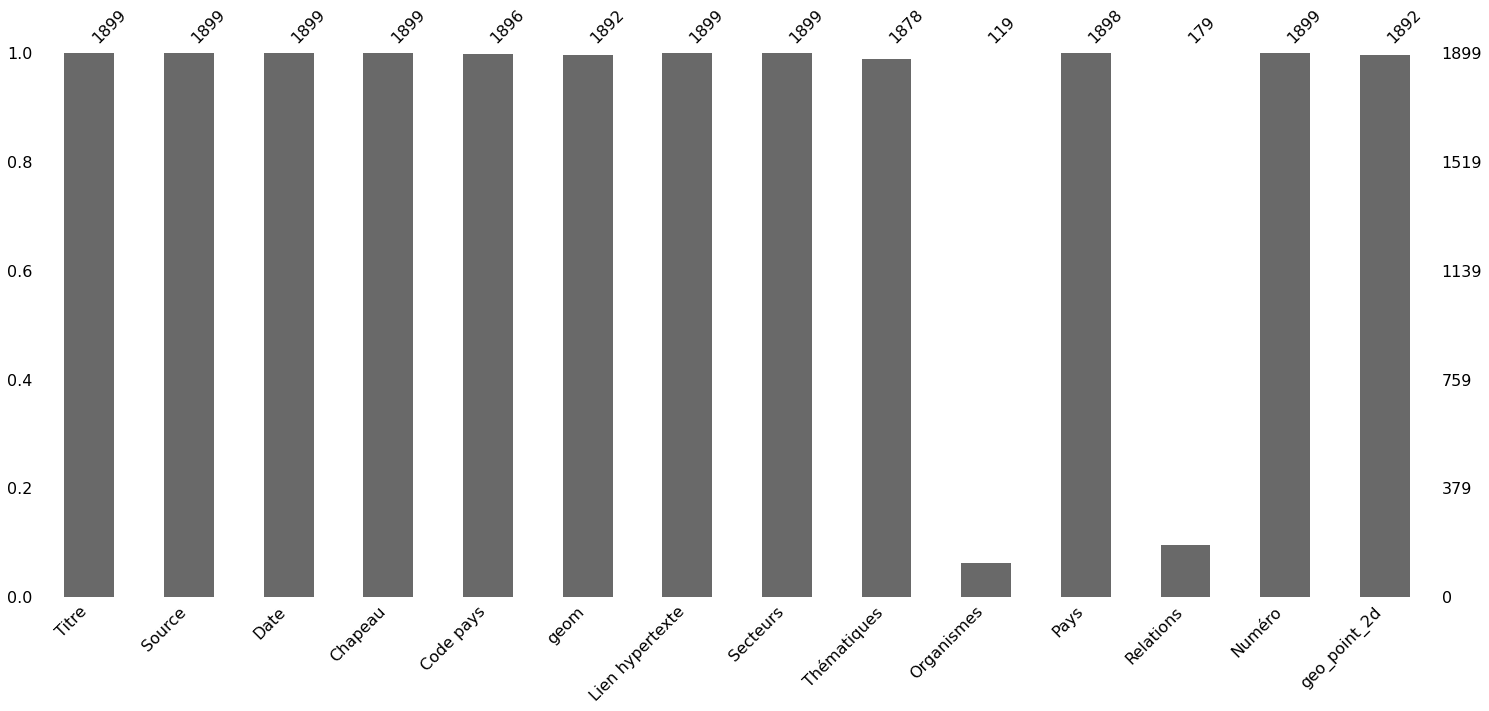

In [13]:
## Afficher l'ensemble des valeurs par colonne avec la fonction missingo via un diagramme en barres.  

mno.bar(pd)

Les valeurs manquantes se trouvent essentiellement dans la colonne Organismes et dans la colonne Relations. Toutefois, il serait intéressant voir le dataframe sur une Matrix afin de voir les possibles autres valeurs manquantes. 


## Vérifier certaines informations déjà affichées dans le rapport : 

In [14]:
## Vérifier doublons

pd.duplicated().sum()

0

In [49]:
# Visualiser les observations de la colonne 'Organismes'
organismes_column = pd['Organismes']

# Visualiser les observations de la colonne 'Organismes' avec les NaN
organismes_column.value_counts(dropna=True)

UNESCO                                                   42
Union européenne (UE)                                    39
Instituts culturels                                       7
Organisation Internationale de la Francophonie (OIF)      6
Agence Universitaire de la Francophonie (AUF)             6
ASEAN                                                     5
Organización de Estados Iberoamericanos (OEI)             4
Organisation des Nations Unies (ONU)                      3
Union Africaine (UA)                                      3
UNESCO, Union européenne (UE)                             2
ICESCO, Agence Universitaire de la Francophonie (AUF)     1
UEMOA                                                     1
Name: Organismes, dtype: int64

L'UNESCO et l'Union européenne sont bien les deux organisations qui octroient les plus de subventions. 

In [50]:
# Visuliser les nombre d'observations via la méthode nunique
organismes_column.nunique()

12

In [51]:
# Obtenir les informations de la colonne Organismes avec l'entrée UNESCO
unesco_rows = pd.loc[pd['Organismes'] == 'UNESCO']
unesco_rows.head(42)

,Titre,Source,Date,Chapeau,Code pays,geom,Lien hypertexte,Secteurs,Thématiques,Organismes,Pays,Relations,Numéro,geo_point_2d
39,Pour la présence de contenu original francopho...,Le Devoir.com,2023-06-29,Le Devoir rapportait [hier] des chiffres inqui...,CAN,"{""coordinates"":[[[[-54.656890429,49.465725002]...",https://www.ledevoir.com/opinion/793796/pour-l...,Industries culturelles,"streaming, politique linguistique, cinéma, mus...",UNESCO,Canada,NaN,2023-06,"61.38266047857158, -98.28160624071468"
62,Creative Youth entrepreneurs preserve Indonesi...,Unesco.org,2023-08-06,A love for fashion design and a keen interest ...,IDN,"{""coordinates"":[[[[121.614105665,-10.602471613...",https://www.unesco.org/en/articles/creative-yo...,Industries créatives,patrimoine,UNESCO,Indonésie,NaN,2023-06,"-2.2230490849490327, 117.27009738544646"
93,Unesco members vote overwhelmingly—but not una...,The Art Newspaper,2023-06-30,The United States is set to rejoin Unesco (the...,USA,"{""coordinates"":[[[[-170.59101315,-14.264825128...",https://www.theartnewspaper.com/2023/06/30/une...,Diplomatie et coopération,diplomatie et coopération culturelle,UNESCO,Etats-Unis,NaN,2023-06,"45.666685570560034, -112.44547812210426"
122,Evaluation favorable pour l'inscription des tu...,Agence de presse Yonhap,2023-11-05,Le Conseil international des monuments et des ...,KOR,"{""coordinates"":[[[[126.946055535,33.478013414]...",https://fr.yna.co.kr/view/AFR20230511001400884,Patrimoine,"patrimoine, monuments et sites historiques",UNESCO,Corée du Sud,NaN,2023-05,"36.38011838937954, 127.82212743876927"
124,Gambia: Ncac Holds Consultative Forum On Inven...,All Africa,2023-09-05,For participatory and not leaving anyone behin...,GMB,"{""coordinates"":[[[[-16.753651496,13.065008856]...",https://allafrica.com/stories/202305090449.html,Patrimoine,"patrimoine, monuments et sites historiques, ar...",UNESCO,Gambie,NaN,2023-05,"13.449204953808637, -15.402506212360175"
206,"Afghan Deputy Minister Meets UNESCO Director, ...",Khaama Press,2023-06-19,"Mawlavi Atiquallh Azizi, the Deputy Minister o...",AFG,"{""coordinates"":[[[[74.542353963,37.021669006],...",https://www.khaama.com/afghan-deputy-minister-...,Patrimoine,"patrimoine, diplomatie et coopération culturelle",UNESCO,Afghanistan,NaN,2023-06,"33.836109090512835, 66.00844837759963"
213,UNESCO workshop supports the fight against ill...,Unesco.org,2023-02-06,The 3-day workshop will contribute to reinforc...,AFG,"{""coordinates"":[[[[74.542353963,37.021669006],...",https://www.unesco.org/en/articles/unesco-work...,Patrimoine,"activités illicites, biens culturels, patrimoine",UNESCO,Afghanistan,NaN,2023-06,"33.836109090512835, 66.00844837759963"
223,UNESCO - Bâtir une industrie des arts du spect...,Unesco.org,2023-06-20,Le projet vise à soutenir la diversité et la v...,KHM,"{""coordinates"":[[[[103.037119988,11.357896226]...",https://www.unesco.org/creativity/fr/articles/...,Création artistique,spectacle vivant,UNESCO,Cambodge,NaN,2023-06,"12.716121947362023, 104.90308727643618"
313,The Cultural Heritage Administration insists b...,The Korea Heald,2023-05-24,The Cultural Heritage Administration said Tues...,KOR,"{""coordinates"":[[[[126.946055535,33.478013414]...",http://www.koreaherald.com/view.php?ud=2023052...,Patrimoine,"patrimoine, monuments et sites historiques",UNESCO,Corée du Sud,NaN,2023-05,"36.38011838937954, 127.82212743876927"
327,Appel à candidature : forum des Jeunes Profess...,UNESCO World Heritage Centre,2023-03-05,En tant que partie intégrante de la 45e sessio...,SAU,"{""coordinates"":[[[[42.186438243,16.705528152],...",https://whc.unesco.org/fr/actualites/2553,Patrimoine,patrimoine,UNESCO,Arabie saoudite,NaN,2023-05,"24.122337854603607, 44.5371995236829"


In [18]:
# Visualiser les observations de la colonne 'Relations'
relations_column = pd['Relations']

#Visualiser les observations de la colonne 'Relations' avec les NaN
relations_column.value_counts(dropna=True)


Russie-Ukraine             5
Chine-Corée du Sud         4
Corée du Sud-Etats-Unis    4
Côte d'Ivoire-France       4
Inde-Royaume-Uni           3
                          ..
Kazakhstan-Syrie           1
Bulgarie-France            1
Palestine-Tunisie          1
Ghana-Royaume-Uni          1
Grèce-Royaume-Uni          1
Name: Relations, Length: 116, dtype: int64

In [19]:
# Vérifier les values (Length) de la table relations_column

relations_column.nunique()


116

In [52]:
# Obtenir les informations de la colonne 'Organismes' avec l'entrée UNESCO
Russie_Ukraine_rows = pd.loc[pd['Relations'] == 'Russie-Ukraine']
Russie_Ukraine_rows.head(42)

,Titre,Source,Date,Chapeau,Code pays,geom,Lien hypertexte,Secteurs,Thématiques,Organismes,Pays,Relations,Numéro,geo_point_2d
35,"Entre écrivains ukrainiens et russes, quel dia...",Le Quotidien,2023-02-06,Le dialogue est-il possible entre écrivains de...,RUS,"{""coordinates"":[[[[164.706900488,58.976828187]...",https://lequotidien.lu/culture/entre-ecrivains...,Création artistique,diplomatie et coopération culturelle,NaN,Russie,Russie-Ukraine,2023-06,"61.96604929247663, 96.62851803527316"
36,"Entre écrivains ukrainiens et russes, quel dia...",Le Quotidien,2023-02-06,Le dialogue est-il possible entre écrivains de...,UKR,"{""coordinates"":[[[[31.94027754,46.204575914],[...",https://lequotidien.lu/culture/entre-ecrivains...,Création artistique,diplomatie et coopération culturelle,NaN,Ukraine,Russie-Ukraine,2023-06,"49.15968821540118, 31.255774331781698"
673,Odesa : L'UNESCO condamne fermement les attaqu...,UNESCO World Heritage Centre,2023-07-23,L'UNESCO est profondément consternée et condam...,UKR,"{""coordinates"":[[[[31.94027754,46.204575914],[...",https://whc.unesco.org/fr/actualites/2592,Patrimoine,patrimoine,UNESCO,Ukraine,Russie-Ukraine,2023-07,"49.15968821540118, 31.255774331781698"
839,"Almost 1,000 attacks on media freedom during R...",IFEX,2023-02-05,IPI's War in Ukraine Press Freedom Tracker doc...,RUS,"{""coordinates"":[[[[164.706900488,58.976828187]...",https://ifex.org/almost-1000-attacks-on-media-...,Médias,"médias, liberté de la presse",NaN,Russie,Russie-Ukraine,2023-05,"61.96604929247663, 96.62851803527316"
1444,"Almost 1,000 attacks on media freedom during R...",IFEX,2023-02-05,IPI's War in Ukraine Press Freedom Tracker doc...,UKR,"{""coordinates"":[[[[31.94027754,46.204575914],[...",https://ifex.org/almost-1000-attacks-on-media-...,Médias,"médias, liberté de la presse",NaN,Ukraine,Russie-Ukraine,2023-05,"49.15968821540118, 31.255774331781698"


La colonne 'Relations' permet d'établir un premier niveau de lien entre deux articles, notamment via les pays concernes. Cela peut éventuellement aider à chercher des infos concernant des points en commun ou des divergences entre pays. 

<AxesSubplot:>

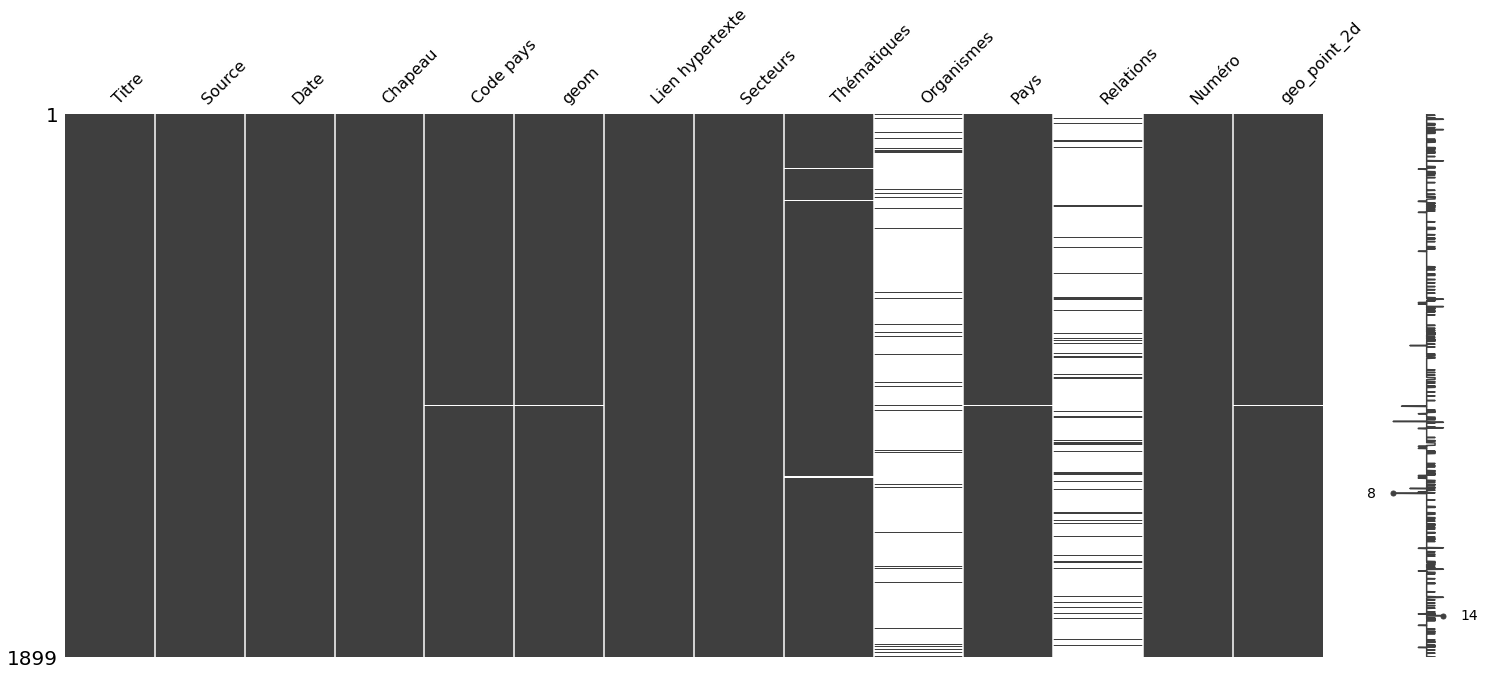

In [53]:
## Visualiser le dataframe initial via une Matrix missingo 
mno.matrix(pd)

In [23]:
# Visualiser les valeurs manquantes de la colonne geom
pd.loc[pd.geom.isna()]

,Titre,Source,Date,Chapeau,Code pays,geom,Lien hypertexte,Secteurs,Thématiques,Organismes,Pays,Relations,Numéro,geo_point_2d
809,Why was a Palestinian song removed from Spotify?,AJE - Al Jazeera English,2023-05-24,The online uproar from fans and activists abou...,PSE,NaN,https://www.aljazeera.com/news/2023/5/24/why-w...,Industries culturelles,"musique, streaming",NaN,Palestine,NaN,2023-05,NaN
1021,EU’s 2023 Rule of Law Report highlights threat...,IFEX,2023-11-07,The fourth Rule of Law report makes specific r...,NaN,NaN,https://ifex.org/eus-2023-rule-of-law-report-h...,Médias,"journalisme, liberté de la presse, presse, médias",Union européenne (UE),NaN,NaN,2023-07,NaN
1074,Comisión de Cultura aprobó proyecto que busca ...,El Mostrador,2023-09-06,La Comisión de Cultura de la Cámara respaldó l...,NaN,NaN,https://www.elmostrador.cl/noticias/2023/06/09...,Création artistique,NaN,NaN,Chili,NaN,2023-06,NaN
1308,The prestigious places are the worst': low pay...,The Art Newspaper,2023-09-06,[...] Working in the art trade might not be su...,"GBR, USA",NaN,https://www.theartnewspaper.com/2023/06/09/opt...,Création artistique,"emploi culturel, artistes-auteurs, marché de l...",NaN,"Etats-Unis, Royaume-Uni",NaN,2023-06,NaN
1325,Le Luxembourg cartonne encore à Annecy!,Ministère de la Culture - Luxembourg,2023-06-15,Le Marché International du Film d'Animation (M...,NaN,NaN,http://gouvernement.lu/fr/actualites/toutes_ac...,Industries culturelles,NaN,NaN,Luxembourg,NaN,2023-06,NaN
1596,Prime Minister calls on UNESCO to protect arch...,Middle East Monitor,2023-07-18,"Palestinian Prime Minister, Muhammad Shtayyeh,...",PSE,NaN,https://www.middleeastmonitor.com/20230718-pm-...,Patrimoine,"archéologie, monuments et sites historiques, p...",UNESCO,Palestine,NaN,2023-07,NaN
1863,British Museum Offers Greece “Exclusive NFT” o...,Hyperallergic,2023-01-04,The British Museum has dug its heels in regard...,"GBR, GRC",NaN,https://hyperallergic.com/812211/british-museu...,Patrimoine,"patrimoine, numérique, diplomatie et coopérati...",NaN,"Royaume-Uni, Grèce",Grèce-Royaume-Uni,2023-04,NaN


In [24]:
# Visualiser les valeurs manquantes de la colonne 'Code pays'
pd.loc[pd['Code pays'].isna()]

,Titre,Source,Date,Chapeau,Code pays,geom,Lien hypertexte,Secteurs,Thématiques,Organismes,Pays,Relations,Numéro,geo_point_2d
1021,EU’s 2023 Rule of Law Report highlights threat...,IFEX,2023-11-07,The fourth Rule of Law report makes specific r...,NaN,NaN,https://ifex.org/eus-2023-rule-of-law-report-h...,Médias,"journalisme, liberté de la presse, presse, médias",Union européenne (UE),NaN,NaN,2023-07,NaN
1074,Comisión de Cultura aprobó proyecto que busca ...,El Mostrador,2023-09-06,La Comisión de Cultura de la Cámara respaldó l...,NaN,NaN,https://www.elmostrador.cl/noticias/2023/06/09...,Création artistique,NaN,NaN,Chili,NaN,2023-06,NaN
1325,Le Luxembourg cartonne encore à Annecy!,Ministère de la Culture - Luxembourg,2023-06-15,Le Marché International du Film d'Animation (M...,NaN,NaN,http://gouvernement.lu/fr/actualites/toutes_ac...,Industries culturelles,NaN,NaN,Luxembourg,NaN,2023-06,NaN


In [54]:
# Visualiser les valerus manquantes de la colonne 'Pays'
pd.loc[pd.Pays.isna()]

,Titre,Source,Date,Chapeau,Code pays,geom,Lien hypertexte,Secteurs,Thématiques,Organismes,Pays,Relations,Numéro,geo_point_2d
1021,EU’s 2023 Rule of Law Report highlights threat...,IFEX,2023-11-07,The fourth Rule of Law report makes specific r...,NaN,NaN,https://ifex.org/eus-2023-rule-of-law-report-h...,Médias,"journalisme, liberté de la presse, presse, médias",Union européenne (UE),NaN,NaN,2023-07,NaN


In [55]:
# Visualiser la distribution des 'Secteurs' auxquels les articles sont reliés 
pd['Secteurs'].value_counts()

Industries culturelles                  410
Patrimoine                              366
Création artistique                     258
Médias                                  228
Politiques culturelles transversales    178
Accès à la culture et éducation         170
Diplomatie et coopération               119
Langues                                  96
Industries créatives                     74
Name: Secteurs, dtype: int64

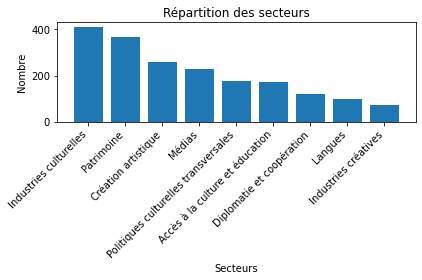

In [56]:
# Créer le graphique en barres de la colonne Secteurs
secteur_counts = pd['Secteurs'].value_counts()
plt.bar(secteur_counts.index, secteur_counts.values)

# Ajouter des labels et un titre
plt.xlabel('Secteurs')
plt.ylabel('Nombre')
plt.title('Répartition des secteurs')

# Rotation des labels sur l'axe x pour une meilleure lisibilité
plt.xticks(rotation=45, ha='right')

# Afficher le graphique
plt.tight_layout()
plt.show()

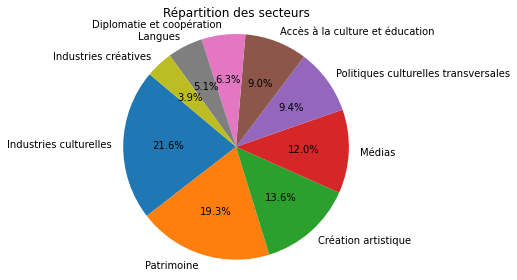

In [57]:
# Créer le graphique en camembert
secteur_counts = pd['Secteurs'].value_counts()
plt.pie(secteur_counts, labels=secteur_counts.index, autopct='%1.1f%%', startangle=140)

# Ajouter un titre
plt.title('Répartition des secteurs')

# Afficher le graphique
plt.axis('equal')  # Assure un aspect circulaire au camembert
plt.tight_layout()
plt.show()

Une fois finit le EDA, on peut créer une nouvelle table pour retirer des informations qui pourront nous intéresser.

Je voudrais notamment voir la quantité d'articles par langue (Français, Anglais, Espagnol), puis connaître les organisations et les pays qui reviennent les plus par langue. 



## 2 : Analyse linguistique base de données ' Veille internationale politiques culturelles.

In [29]:
## Création d'une nouvelle table d'analyse linguistique

Analyse_Linguistique= pd.drop(columns=['Date','geom','Numéro','geo_point_2d'])
Analyse_Linguistique.head()

,Titre,Source,Chapeau,Code pays,Lien hypertexte,Secteurs,Thématiques,Organismes,Pays,Relations
0,"ABC Programa ""Sonidos para la construcción de ...",Ministerio de Cultura,En el marco del plan de desarrollo 2022-2026 “...,COL,http://www.mincultura.gov.co/prensa/noticias/P...,Politiques culturelles transversales,"musique, formation, ministère de la culture",NaN,Colombie,NaN
1,Columna de Ascanio Cavallo: Frankfurt am Main,LA TERCERA,"La chambonada de la semana (¿o del mes, del añ...",CHL,https://www.latercera.com/opinion/noticia/colu...,Politiques culturelles transversales,"livre, ministère de la culture, diplomatie et ...",NaN,Chili,NaN
2,Le gouvernement approuve une valorisation des ...,L'opinion,"Présenté par le ministre de la de la Jeunesse,...",MAR,https://www.lopinion.ma/Le-gouvernement-approu...,Politiques culturelles transversales,"musique, danse, spectacle vivant, emploi cultu...",NaN,Maroc,NaN
3,Amplia producción artística de la comunidad LG...,Hoja deruta digital,La Secretaría de Cultura del Gobierno de Méxic...,MEX,https://hojaderutadigital.mx/amplia-produccion...,Politiques culturelles transversales,"théâtre, spectacle vivant, musée, lgbtqia+, livre",NaN,Mexique,NaN
4,Budget Culture : Rs 80 M pour faire du stade A...,LeMauricien,"Le Grand Argentier, Renganaden Padayachy, a an...",MUS,http://www.lemauricien.com/le-mauricien/budget...,Politiques culturelles transversales,"musique, spectacle vivant, financement",NaN,Maurice,NaN


In [58]:
## Installation de la bibliothèque langdetect via pip. - pour détecter 
!pip install langdetect

In [60]:
from langdetect import detect


# Créer une fonction pour détecter la langue à l'aide de langdetect
def detect_language(Chapeau):
    try:
        return detect(Chapeau)
    except:
        return "Langue non détectée"  # En cas d'erreur de détection

# Appliquer la fonction de détection de la langue au DataFrame
Analyse_Linguistique['langue_detectee'] = Analyse_Linguistique['Chapeau'].apply(detect_language)


In [32]:
# Nouvelle table avec une nouvelle colonne langue_detectée 

Analyse_Linguistique.head(10)
                         

,Titre,Source,Chapeau,Code pays,Lien hypertexte,Secteurs,Thématiques,Organismes,Pays,Relations,langue_detectee
0,"ABC Programa ""Sonidos para la construcción de ...",Ministerio de Cultura,En el marco del plan de desarrollo 2022-2026 “...,COL,http://www.mincultura.gov.co/prensa/noticias/P...,Politiques culturelles transversales,"musique, formation, ministère de la culture",NaN,Colombie,NaN,es
1,Columna de Ascanio Cavallo: Frankfurt am Main,LA TERCERA,"La chambonada de la semana (¿o del mes, del añ...",CHL,https://www.latercera.com/opinion/noticia/colu...,Politiques culturelles transversales,"livre, ministère de la culture, diplomatie et ...",NaN,Chili,NaN,es
2,Le gouvernement approuve une valorisation des ...,L'opinion,"Présenté par le ministre de la de la Jeunesse,...",MAR,https://www.lopinion.ma/Le-gouvernement-approu...,Politiques culturelles transversales,"musique, danse, spectacle vivant, emploi cultu...",NaN,Maroc,NaN,fr
3,Amplia producción artística de la comunidad LG...,Hoja deruta digital,La Secretaría de Cultura del Gobierno de Méxic...,MEX,https://hojaderutadigital.mx/amplia-produccion...,Politiques culturelles transversales,"théâtre, spectacle vivant, musée, lgbtqia+, livre",NaN,Mexique,NaN,es
4,Budget Culture : Rs 80 M pour faire du stade A...,LeMauricien,"Le Grand Argentier, Renganaden Padayachy, a an...",MUS,http://www.lemauricien.com/le-mauricien/budget...,Politiques culturelles transversales,"musique, spectacle vivant, financement",NaN,Maurice,NaN,fr
5,"Lancement d’ “ASF'ART”, premier Fonds de mobil...",Libération (Maroc),"Le Fonds ""ASF'ART"" pour la promotion de la mob...",MAR,https://www.libe.ma/Lancement-d-ASF-ART--premi...,Politiques culturelles transversales,financement,Instituts culturels,Maroc,NaN,fr
6,Arts Council England to invest £20m in second ...,Museums + Heritage Advisor,The post Arts Council England to invest £20m i...,GBR,https://advisor.museumsandheritage.com/news/ar...,Politiques culturelles transversales,"financement, sécurité, transition écologique",NaN,Royaume-Uni,NaN,en
7,Adoption à l’Assemblée nationale de la loi sur...,Gabonreview.com,"Au Gabon, les artistes et les acteurs culturel...",GAB,https://www.gabonreview.com/gabon-adoption-a-l...,Politiques culturelles transversales,"artistes-auteurs, législation",NaN,Gabon,NaN,fr
8,"Les sites historiques de Hanoi accueillent 1,7...",VietnamPlus,Selon le Service municipal de la culture et de...,VNM,https://fr.vietnamplus.vn/les-sites-historique...,Patrimoine,"patrimoine, tourisme, économie, monuments et s...",NaN,Vietnam,NaN,fr
9,Experts urge Singapore museums to review their...,TODAY,History and arts experts say that museums shou...,SGP,https://www.todayonline.com/singapore/experts-...,Patrimoine,"patrimoine, biens culturels, diplomatie et coo...",NaN,Singapour,NaN,en


Langues detectées: Français (fr) / Espagnol (es) / Anglais (en)

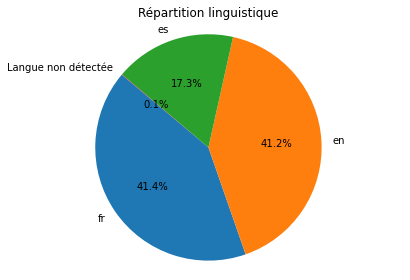

In [33]:
# Créer le graphique en camembert
Langues_counts = Analyse_Linguistique['langue_detectee'].value_counts()
plt.pie(Langues_counts, labels=Langues_counts.index, autopct='%1.1f%%', startangle=140)

# Ajouter un titre
plt.title('Répartition linguistique')

# Afficher le graphique
plt.axis('equal')  # Assure un aspect circulaire au camembert
plt.tight_layout()
plt.show()

In [61]:
## Visualiser le nombre d'articles par langue 
Langues_counts.head()

fr                     787
en                     782
es                     329
Langue non détectée      1
Name: langue_detectee, dtype: int64

Les résultats montrent : 
    
    787 articles en Français 
    782 articles en Anglais 
    329 articles en Espagnol 

In [35]:
#Chercher tous les articles avec le code pays Colombie 

Resultats_Colombie = Analyse_Linguistique.loc[Analyse_Linguistique['Code pays'] == 'COL']

Resultats_Colombie.head(19)

,Titre,Source,Chapeau,Code pays,Lien hypertexte,Secteurs,Thématiques,Organismes,Pays,Relations,langue_detectee
0,"ABC Programa ""Sonidos para la construcción de ...",Ministerio de Cultura,En el marco del plan de desarrollo 2022-2026 “...,COL,http://www.mincultura.gov.co/prensa/noticias/P...,Politiques culturelles transversales,"musique, formation, ministère de la culture",NaN,Colombie,NaN,es
70,Fiscalía puso en marcha una directiva para pro...,Eltiempo,[...] Este martes el fiscal general Francisco ...,COL,https://www.eltiempo.com/justicia/investigacio...,Médias,"liberté de la presse, journalisme, presse, médias",NaN,Colombie,NaN,es
144,República Dominicana ve necesario un mercado c...,El Nacional,La circulación de contenido cinematográfico pr...,COL,https://elnacional.com.do/rd-ve-necesario-un-m...,Industries culturelles,"cinéma, audiovisuel",NaN,Colombie,NaN,es
238,Medellín lidera la compra online de libros seg...,El Colombiano,El consumo de libros de venta online ha tenido...,COL,https://www.elcolombiano.com/cultura/cifras-de...,Industries culturelles,"livre, lecture, consommation culturelle",NaN,Colombie,NaN,es
269,Un grupo de 19 expresidentes de América Latina...,Análisis de actualidad Revista Semana,Un grupo de 19 expresidentes de América Latina...,COL,https://www.semana.com/politica/articulo/un-gr...,Médias,"presse, liberté de la presse, journalisme, dip...",NaN,Colombie,NaN,es
309,Cada vez más cerca de una Ley de Museos para C...,El Colombiano,En días pasados se llevó a cabo la XII Mesa Na...,COL,https://www.elcolombiano.com/cultura/ley-de-mu...,Patrimoine,"législation, musée, patrimoine",NaN,Colombie,NaN,es
347,Artistas audiovisuales piden que reactiven bec...,El Colombiano,Es uno de los puntos que están consignados en ...,COL,https://www.elcolombiano.com/cultura/sector-au...,Industries culturelles,"financement, cinéma, audiovisuel",NaN,Colombie,NaN,es
633,El Ministerio de Educación Nacional y el Minis...,Ministerio de Cultura,[...] El objetivo del encuentro fue revisar la...,COL,http://www.mincultura.gov.co/prensa/noticias/P...,Accès à la culture et éducation,"éducation artistique et culturelle, ministère ...",NaN,Colombie,NaN,es
732,"Las actrices, los actores y el mercado audiovi...",El Espectador,La próxima semana se inaugura el Bogotá Audiov...,COL,https://www.elespectador.com/opinion/columnist...,Industries culturelles,"audiovisuel, cinéma",NaN,Colombie,NaN,es
774,Artistas insisten en reclamos a Petro por mala...,El Colombiano,El Ministerio de Cultura cumplió dos meses y 2...,COL,https://www.elcolombiano.com/colombia/artistas...,Politiques culturelles transversales,"ministère de la culture, artistes-auteurs",NaN,Colombie,NaN,es


In [62]:
# Dix - neuf articles concernent l'observation Colombie 
Resultats_Colombie.shape

(19, 11)

In [63]:
#Chercher tous les articles avec le code pays USA

Resultats_USA = Analyse_Linguistique.loc[Analyse_Linguistique['Code pays'] == 'USA']

Resultats_USA.head(25)


,Titre,Source,Chapeau,Code pays,Lien hypertexte,Secteurs,Thématiques,Organismes,Pays,Relations,langue_detectee
10,Measuring Museum Social Impact: Lessons and Re...,American Alliance of Museums,"With IMLS funding, the Measurement of Museum S...",USA,https://www.aam-us.org/2023/06/26/measuring-mu...,Patrimoine,"musée, patrimoine",NaN,Etats-Unis,NaN,en
11,Crystal Bridges Museum of American Art announc...,artdaily.com,Building on its commitment to expand access an...,USA,https://artdaily.com/news/158571/Crystal-Bridg...,Patrimoine,"musée, patrimoine",NaN,Etats-Unis,NaN,en
12,African American Cultural Heritage Action Fund...,Archinect,The National Trust for Historic Preservation’s...,USA,https://archinect.com/news/article/150353354/a...,Patrimoine,"monuments et sites historiques, financement, o...",NaN,Etats-Unis,NaN,en
22,Museum lawyers weigh in on diversity initiativ...,The Art Newspaper,"Last month more than 300 lawyers, museum staff...",USA,https://www.theartnewspaper.com/2023/06/01/leg...,Patrimoine,"musée, patrimoine",NaN,Etats-Unis,NaN,en
81,Strategies for Engaging and Representing Latin...,American Alliance of Museums,Strategies for Engaging and Representing Latin...,USA,https://www.aam-us.org/2023/06/19/strategies-f...,Accès à la culture et éducation,"musée, origine ethnique, diversité et inclusion",NaN,Etats-Unis,NaN,en
93,Unesco members vote overwhelmingly—but not una...,The Art Newspaper,The United States is set to rejoin Unesco (the...,USA,https://www.theartnewspaper.com/2023/06/30/une...,Diplomatie et coopération,diplomatie et coopération culturelle,UNESCO,Etats-Unis,NaN,en
155,75% Of Artists Make A Loss When They Release M...,Pirate.com,Our new research finds 75% of musicians who sp...,USA,https://pirate.com/en/blog/seventy-five-percen...,Industries culturelles,"musique, médias sociaux, économie",NaN,Etats-Unis,NaN,en
162,USAID Offers Protection to Journalists & NGOs ...,Inter press service,[...] The Washington-based US Agency for Inter...,USA,https://www.ipsnews.net/2023/05/usaid-offers-p...,Médias,"presse, journalisme, liberté de la presse, médias",NaN,Etats-Unis,NaN,en
196,Less than half of California State University ...,The Art Newspaper,The California universities “generally lack th...,USA,https://www.theartnewspaper.com/2023/06/30/cal...,Patrimoine,"biens culturels, enseignement supérieur, peupl...",NaN,Etats-Unis,NaN,en
200,Art and heritage groups must ‘take action now’...,The Art Newspaper,Authors of a new report from the the Foundatio...,USA,https://www.theartnewspaper.com/2023/06/26/cli...,Patrimoine,"transition écologique, musée, patrimoine",NaN,Etats-Unis,NaN,en


In [64]:
Resultats_USA.tail(25)

,Titre,Source,Chapeau,Code pays,Lien hypertexte,Secteurs,Thématiques,Organismes,Pays,Relations,langue_detectee
1525,Un juge américain bloque temporairement l’acqu...,ICI.Radio-Canada,La FTC a demandé lundi à un tribunal fédéral d...,USA,https://ici.radio-canada.ca/nouvelle/1987946/m...,Industries culturelles,"jeu vidéo, économie",NaN,Etats-Unis,NaN,fr
1532,White House Announces New Position to Combat B...,Publishers Weekly,"In celebration of Pride Month, the White House...",USA,http://www.publishersweekly.com/pw/by-topic/in...,Industries culturelles,"livre, lgbtqia+, censure, origine ethnique, bi...",NaN,Etats-Unis,NaN,en
1536,The 19th Explains: The Supreme Court’s decisio...,19thnews.org,At issue was whether a Colorado web designer h...,USA,https://19thnews.org/2023/06/303-creative-elen...,Industries créatives,"discrimination, lgbtqia+",NaN,Etats-Unis,NaN,en
1552,New Report: Unpacking 2023 Legislation of Conc...,Everylibrary.org,EveryLibrary is issuing a comprehensive report...,USA,https://www.everylibrary.org/unpacking_2023_le...,Accès à la culture et éducation,"bibliothèque, législation, livre",NaN,Etats-Unis,NaN,en
1553,Llano County libraries case has lawyers and pu...,Texastribune.org,Libraries have been at the receiving end of bo...,USA,https://www.texastribune.org/2023/06/19/llano-...,Accès à la culture et éducation,"livre, bibliothèque, censure",NaN,Etats-Unis,NaN,en
1556,New York Prison System Abruptly Halts Policy C...,The Nation,One day after New York Focus broke the story a...,USA,https://www.thenation.com/article/society/new-...,Accès à la culture et éducation,"justice et prison, liberté d'expression, artis...",NaN,Etats-Unis,NaN,en
1559,Freedom to Read Foundation Joins Coalition of ...,ALA,"The Freedom to Read Foundation, the First Amen...",USA,https://www.ala.org/news/press-releases/2023/0...,Accès à la culture et éducation,"bibliothèque, législation, censure, livre",NaN,Etats-Unis,NaN,en
1577,National Endowment for the Arts chair visits N...,Indian Country Today,Chair Maria Rosario Jackson visited western So...,USA,https://ictnews.org/news/national-endowment-fo...,Politiques culturelles transversales,peuples,NaN,Etats-Unis,NaN,en
1592,The Smithsonian Latino American Museum's Futur...,ARTnews,The fate of the Smithsonian Latino Museum is i...,USA,https://www.artnews.com/art-news/news/smithson...,Patrimoine,"musée, origine ethnique, financement, patrimoine",NaN,Etats-Unis,NaN,en
1613,"Theaters In Crisis: Layoffs, Cost-Cuts Imperil...",The Hollywood Reporter,Nonprofit leaders across the country are sound...,USA,https://www.hollywoodreporter.com/business/bus...,Création artistique,"théâtre, spectacle vivant, économie",NaN,Etats-Unis,NaN,en


In [65]:
# Sélectionnez les lignes où la colonne "langue" a les valeurs "fr", "en" ou "es".
Langue_detectee = Analyse_Linguistique[Analyse_Linguistique['langue_detectee'].isin(['fr', 'en', 'es'])]

# Triez les données en fonction de la colonne "langue".
Langue_detectee = Langue_detectee.sort_values(by='langue_detectee')

# Réinitialisez les index de la nouvelle table si nécessaire.
Langue_detectee.reset_index(drop=True, inplace=True)

Langue_detectee.head()

,Titre,Source,Chapeau,Code pays,Lien hypertexte,Secteurs,Thématiques,Organismes,Pays,Relations,langue_detectee
0,Music concert held in Madrid promotes China-Sp...,Globaltimes.cn,A music concert to kick off the 2023 China-Spa...,ESP,https://www.globaltimes.cn/page/202304/1288452...,Diplomatie et coopération,diplomatie et coopération culturelle,NaN,Espagne,Chine-Espagne,en
1,Lin-Manuel Miranda Launches Theater Directory ...,The Hollywood Reporter,Lin-Manuel Miranda is creating a national thea...,USA,https://www.hollywoodreporter.com/lifestyle/ar...,Création artistique,"théâtre, spectacle vivant, emploi culturel, di...",NaN,Etats-Unis,NaN,en
2,The prestigious places are the worst': low pay...,The Art Newspaper,[...] Working in the art trade might not be su...,"GBR, USA",https://www.theartnewspaper.com/2023/06/09/opt...,Création artistique,"emploi culturel, artistes-auteurs, marché de l...",NaN,"Etats-Unis, Royaume-Uni",NaN,en
3,Festivals funding to support regional artists ...,Minister.infrastructure.gov.au,The Albanese Labor Government is supporting a ...,AUS,https://minister.infrastructure.gov.au/burke/m...,Création artistique,"festival, financement",NaN,Australie,NaN,en
4,Film industry increases positive impact on loc...,Vietnamnet,Da Nang Film Festival Awards Ceremony - an int...,VNM,https://vietnamnet.vn/en/film-industry-increas...,Industries culturelles,"cinéma, économie, festival",NaN,Vietnam,NaN,en


Cette nouvelle table est prête pour être exportée et travaillée, elle est triée par langue en FR/EN/ES.

Je dois avouer que j'ai prétendu chercher des articles dont le Code pays soit FR, mais j'ai oublié pendant quelques minutes qu'il s'agissait d'une veille internationale.

In [40]:
! pip install openpyxl

In [41]:
Langue_detectee.to_excel(r'C:\Users\ivanramirez\Desktop\export_dataframe.xlsx', index=False)

In [42]:
!pip install nbconvert